**OBJECTIVE OF STUDY**

Aim of this study is prediction whether the customer Churn or not, we want to build a Classification models and compare results.
Before beginning modelling we will make EDA und Data cleaning. 

**DATASET DESCRIPTION**

The data was downloaded from Kaggle Data Sets and it is taken from IBM datasets for customer retention programs. The goal of this project is to predict behaviors of churn or not churn to help retain customers. Each row represents a customer, each column contains a customer’s attribute.

Customers who left within the last month – the column is called Churn

- customerID : Customer ID 
- gender : Whether the customer is a male or a female
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
-Partner : Whether the customer has a partner or not (Yes, No)
-Dependents : Whether the customer has dependents or not (Yes, No)
-tenure : Number of months the customer has stayed with the company
-PhoneService : Whether the customer has a phone service or not (Yes, No)
-MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
-InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
-OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
-OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
-DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
-TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
-StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
-StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
-Contract : The contract term of the customer (Month-to-month, One year, Two year)
-PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
-PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit -card (automatic))
-MonthlyCharges : The amount charged to the customer monthly
-TotalCharges : The total amount charged to the customer
-Churn : Whether the customer churned or not (Yes or No)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action= "ignore")

In [6]:
df=pd.read_csv("./data/Telco-Customer-Churn.csv")
df.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**DATA CLEANING and EDA**

From Data inspection we understand that there is 21 Features. The datatypes are as seen float64(1), int64(2), object(18). First off all I want to learn whether there is null values



Using the information on how many services have been received, Feature Engineering can be done and a new feature can be created. For example, data grouping can be done using "pandas.cut" since total charges and montly charges integer feature.

**Missing Data Analysis**

In [7]:
# With this function we find out which features have null values

def missing_df(df):
    
    total_missing = df.isnull().sum().sort_values(ascending = False)
    pct_missing = total_missing/len(df)*100
    pct_missing = pct_missing.round(1)
    missing_df = pd.concat([total_missing, pct_missing], axis = 1, keys=["Total", "Pct"])
    #missing_df.columns = ["Total", "Pct"]
    return missing_df[missing_df.Total > 0]


print("Missing Values \n ", missing_df(df))
print("Shape of the Dataframe is", df.shape)

Missing Values 
  Empty DataFrame
Columns: [Total, Pct]
Index: []
Shape of the Dataframe is (7043, 21)


There seems there is no nissing value. I want to learn if some features hat empty space like " " 
and Pyton can interpret diese values as not null and it will cause problems while we build our Model

In [10]:
# for i in df.columns:
#     df[i].replace(" ",np.nan,inplace=True)


In [30]:
# missing_df(df)

We have found that TotalCharges feature has 11 empty values and we that may result because the Customer is new and not charged yet. When we checked the tenure for this customer, it seems to be they are new, and we have updated this 11 value with 0.

In [8]:
df[df.TotalCharges==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
# replacing Totalcharges wit 0 where the value is not (as " " entered) entered
df["TotalCharges"].replace(" ", 0, inplace=True)

In [10]:
df.dropna(inplace=True)

print("Missing Values \n ", missing_df(df))
print("Shape of the Dataframe is", df.shape)

Missing Values 
  Empty DataFrame
Columns: [Total, Pct]
Index: []
Shape of the Dataframe is (7043, 21)






After finding missing values and dropping them we can go on working on Data. We will drop the Features that give not any information. Also we will transform float oder interger features that seems to be object. So as to work on this Data first of all I want to decode features with Yes and No with 1 and 0 respectively. After then we will use get_dummies() function and make ready our Data for further analysis

In [11]:
# DDropping customer ID
df.drop(["customerID"],axis=1,inplace=True)

In [12]:
#TotalCharges seems to be object but the values are float. first of all we are transforming TotalCharges feature to float
# totalcharges ve monthlycharges are converted to integer
df["TotalCharges"] = df.TotalCharges.astype(float)
df["TotalCharges"] = df.TotalCharges.astype(int)
df["MonthlyCharges"] = df.MonthlyCharges.astype(int)

**FEATURE ENGINEERING**

In [13]:
# we can see the monthly payment interval and that will help see churn. We cretae new feature by binning as MonthlyChargesInterval

df["MonthlyChargesInterval"] = pd.cut(df.MonthlyCharges, bins=[0,20,40,60,80,100,120], 
                                      labels=["0-20", "20-40", "40-60", "60-80","80-100","100-120"])


In [14]:
# we can see thetenure interval and that will help see churn. We cretae new feature by binning as MonthlyChargesInterval

df["TenureInterval"] = pd.cut(df.MonthlyCharges, bins=[0,12,24,36,48,60,72,84], 
                                      labels=["0-12", "12-24", "24-36", "36-48","48-60","60-72","72-84"])

In [92]:
# we want to learn if the number of services that the customer has influences the churn. Therefore we will add new feature numberof services
# services that can be bought are: PhoneService, InternetService, MultipleLines, OnlineSecurity,
# OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
# Services=["PhoneService", "InternetService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
#  df["CustomerServices"]=np.NaN
# df.drop(["CustomerServices"],axis=1,inplace=True)
# for i in Services:
#     if df[df[i][j]=="Yes"]


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gender                  7043 non-null   int64   
 1   SeniorCitizen           7043 non-null   int64   
 2   Partner                 7043 non-null   int64   
 3   Dependents              7043 non-null   int64   
 4   tenure                  7043 non-null   int64   
 5   PhoneService            7043 non-null   int64   
 6   MultipleLines           7043 non-null   object  
 7   InternetService         7043 non-null   object  
 8   OnlineSecurity          7043 non-null   object  
 9   OnlineBackup            7043 non-null   object  
 10  DeviceProtection        7043 non-null   object  
 11  TechSupport             7043 non-null   object  
 12  StreamingTV             7043 non-null   object  
 13  StreamingMovies         7043 non-null   object  
 14  Contract                

In [15]:
# Since we are dealing with Churn our target class was into two category diveded. 
# df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df["Churn"].replace("No", 0, inplace=True)
df["Churn"].replace("Yes", 1, inplace=True)

In [16]:
# We are finding the numeric and categorik features
numerical_features = df.dtypes[df.dtypes != 'object'].index
categorical_features = df.dtypes[df.dtypes == 'object'].index
print("categorical_features", categorical_features)
print("numerical_features", numerical_features)

categorical_features Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
numerical_features Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthlyChargesInterval', 'TenureInterval'],
      dtype='object')


**GRAFICS OF CATEGORICAL VALUES**

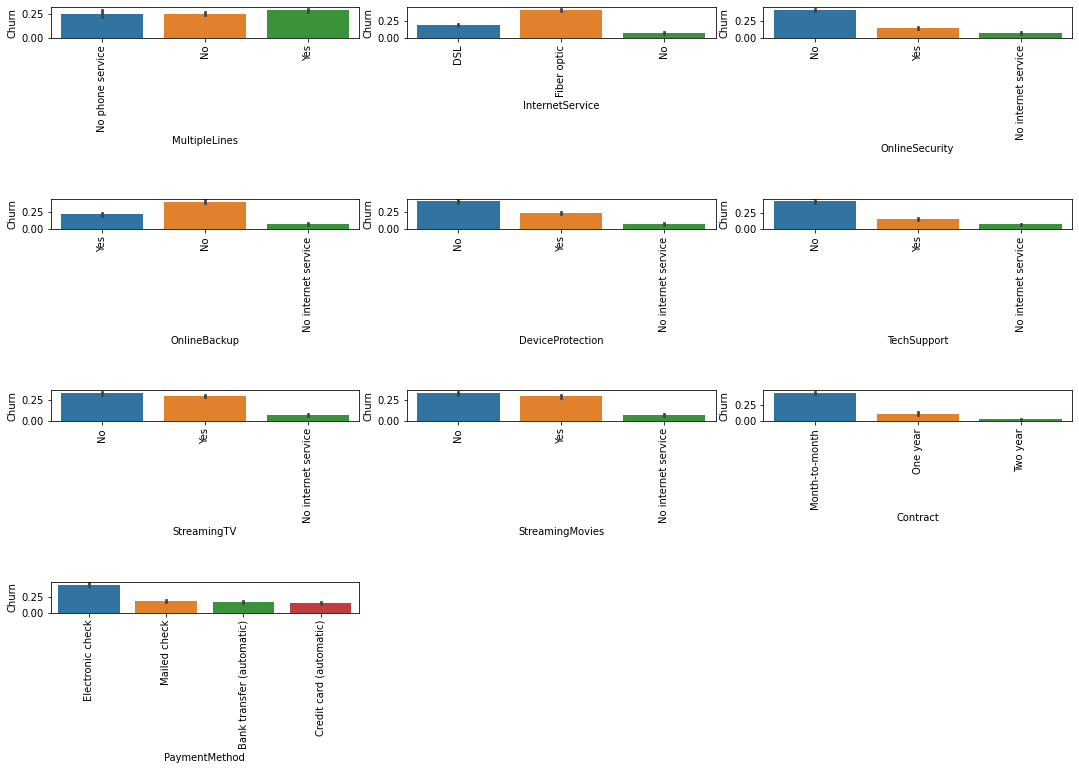

In [165]:

plt.figure(figsize=(15,30))
for i, col in enumerate(categorical_features[:]):
    plt.subplot(12,3,i+1)
    sns.barplot(data=df, x=categorical_features[i], y="Churn")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can understand from the categorical features that these features have important effeckt on Churn:
    Partner,Dependents, Internetservice, Contract, PaperlessBilling, Techsupport, Online security, Deviceprotection 

**GRAFICS OF NUMERIC VALUES**

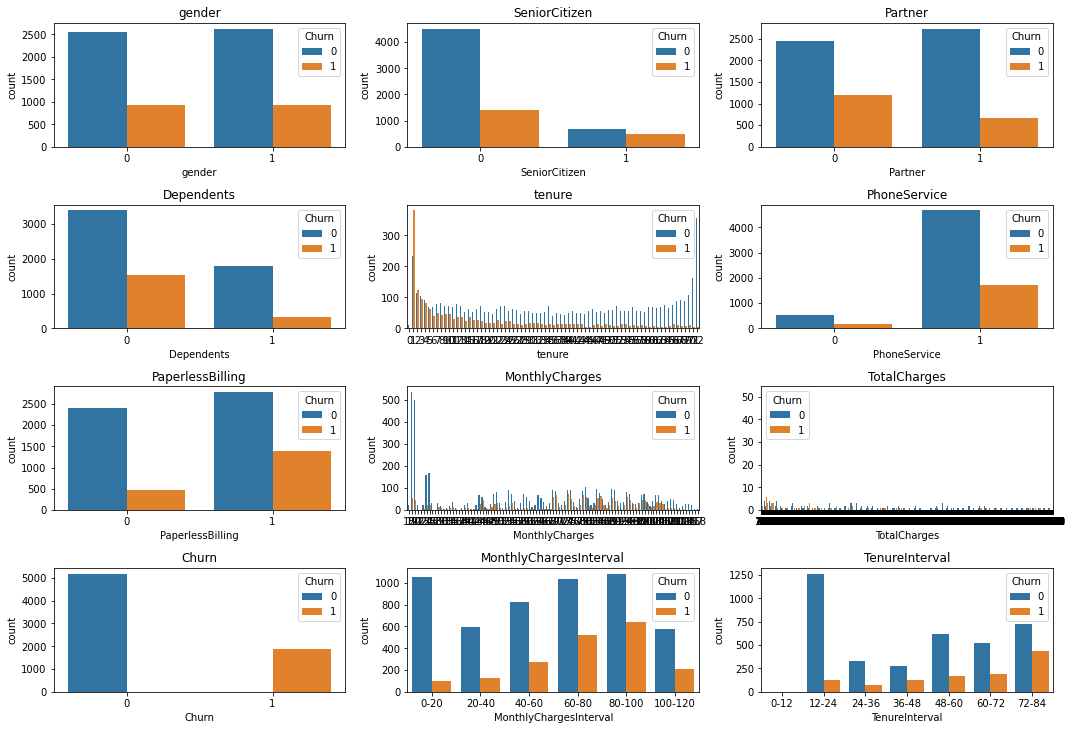

In [164]:

plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_features[:]):
    plt.subplot(12,3,i+1)
    sns.countplot(data=df,x=numerical_features[i], hue="Churn")
    plt.title(col)
#     plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the numericalfeatures we can understanda that these features have important effeckt on Churn:  Tenure, SeniorCitizen, MonthlyCharges, Totalcharges

In [17]:
#From the EDA grafiks we can decide which feature can be decoded.

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

 Value counts 
 0    5174
1    1869
Name: Churn, dtype: int64


Customers Churn-Leave within a month ratio    : %26.54
Customers Not Churn-Retain  within a month ratio    : %73.46


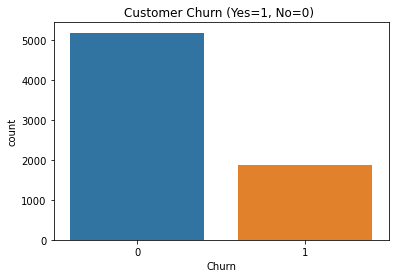

In [18]:
# We are investigating the target feature 

# plt.figure(figsize=(15,30))
sns.countplot(df.Churn)
plt.title("Customer Churn (Yes=1, No=0) ")
print(" Value counts \n", df["Churn"].value_counts())
print("\n")
print("Customers Churn-Leave within a month ratio    : %{:.2f}".format(sum(df.Churn)/len(df.Churn)*100))

print("Customers Not Churn-Retain  within a month ratio    : %{:.2f}".format((len(df.Churn)-sum(df.Churn))/len(df.Churn)*100))

The Class distribution seems to be imbalanced, we will apply same upscaling methodes like SMOTE to deal with imbalanced data problem.

**IMBALANCED DATA PROBLEM?**

Text(0.5, 0, 'Churn')

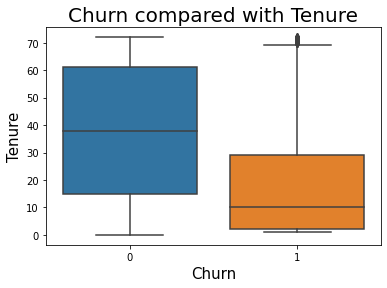

In [150]:
# How can Churn changes with the change of Tenure
plt.figure(figsize=(6,4))
plt1 = sns.boxplot(x='Churn', y = 'tenure', data=df)
plt1.set_title('Churn compared with Tenure', fontsize=20)
plt1.set_ylabel('Tenure', fontsize = 15)
plt1.set_xlabel('Churn', fontsize = 15)

Text(0.5, 0, 'Monthly Charges')

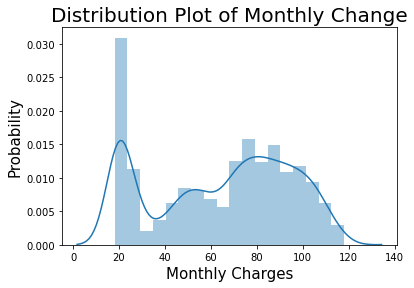

In [154]:
# Distribution plot of Monthlycharge
plt.figure(figsize=(6,4))
plt1 = sns.distplot((df.MonthlyCharges))
plt1.set_title('Distribution Plot of Monthly Change', fontsize=20)
plt1.set_ylabel('Probability', fontsize = 15)
plt1.set_xlabel('Monthly Charges', fontsize = 15)

Text(0.5, 0, 'Tenure')

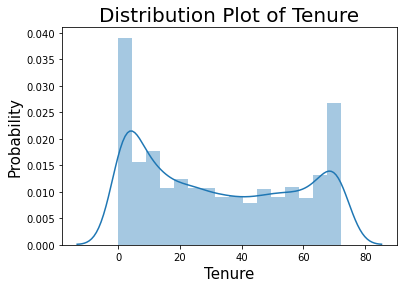

In [156]:
# Distribution plot of Tenure
plt.figure(figsize=(6,4))
plt1 = sns.distplot(df.tenure)
plt1.set_title('Distribution Plot of Tenure', fontsize=20)
plt1.set_ylabel('Probability', fontsize = 15)
plt1.set_xlabel('Tenure', fontsize = 15)

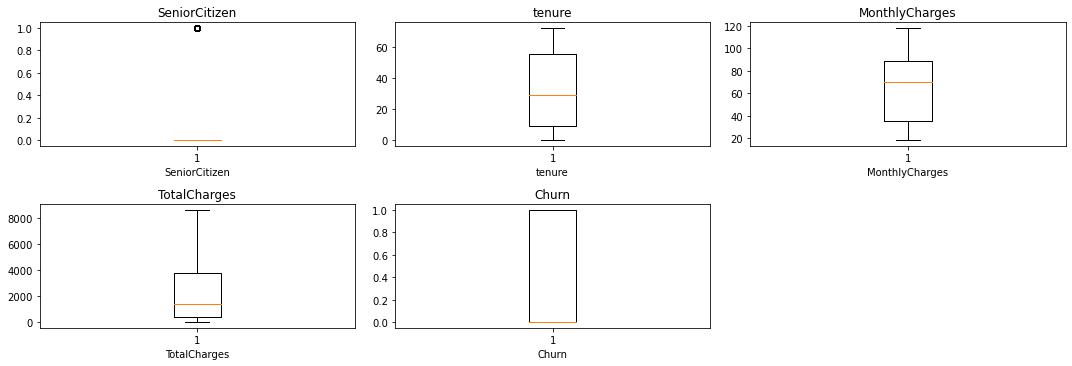

In [149]:
# Investigating Outliers with Boxplot

plt.figure(figsize=(15,30))
for i, col in enumerate(numerical_features[:-1]):
    
    plt.subplot(12,3,i+1)
    plt.boxplot(dfm[col])
    plt.xlabel(col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [19]:
dfm=df.copy()

In [20]:
# We are getting dummies for the remaining features
dfm=pd.get_dummies(dfm)

In [21]:
dfm.shape

(7043, 54)

**MODELLING**


We are starting Modelling the data so as to find the best classification model

**LOGISTIC REGRESSION**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [23]:
X=dfm.drop("Churn", axis=1)
y=dfm["Churn"]

In [24]:
# Split dataframe As TRain and Test
    
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)

In [23]:
# X ve y veriseti ile modellerimizi kuruyoruz ve classification report alıyoruz

def create_log_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression(penalty="l2", C=10.0)
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy for Logisticregression is-train : {}\n".format(logreg_model.score(X_train, y_train)))
    print("Accuracy for Logisticregression is-test : {}\n".format(logreg_model.score(X_test, y_test)))
       
     
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [24]:
create_log_model(X, y)

Accuracy for Logisticregression is-train : 0.806354277600284

Accuracy for Logisticregression is-test : 0.8048261178140526

Train Dataset
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4139
           1       0.66      0.56      0.61      1495

    accuracy                           0.81      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634

Test Dataset
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



After modelling with Logistic resgesyon we have accuracy rate of 0.795.  When we investigate Train set and test set, we can see that there is not a Overfitting. Our aim is find the Customer that Churn in other words leave than the Preciison and recall is important for value 1. From the test data we can understand that precision is 0.65and the recall is 0.51. Than we are investigating if we can solve the imbalance data with SMOTE and get higher values.

**RESAMPLING with SMOTE Method**

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smm = SMOTE(random_state=3, sampling_strategy=1.0)
X_sm_train, y_sm_train = smm.fit_resample(X_train, y_train)

In [42]:
def create_log_model_smote(X_sm_train, y_sm_train, X_test, y_test):
   
    logreg_models = LogisticRegression()
    logreg_models.fit(X_sm_train, y_sm_train)

    pred_train_s = logreg_models.predict(X_sm_train)
    pred_test = logreg_models.predict(X_test)
    
    conf_mtx_train_s = confusion_matrix(y_sm_train, pred_train_s)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_models.score(X_train, y_train)))
    print("Accuracy : {}\n".format(logreg_models.score(X_test, y_test)))
    
    print("confusion Matrix-train_s")
    print(conf_mtx_train_s)
    
    print("confusion Matrix-test")
    print(conf_mtx_test)
    
    print("Train Dataset_ Smote dataset")
    print(classification_report(y_sm_train, pred_train_s))
    
    print("Test with Original test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [29]:
create_log_model_smote(X_sm_train, y_sm_train, X_test, y_test)

Accuracy : 0.7715654952076677

Accuracy : 0.7672107877927609

confusion Matrix-train_s
[[3342  797]
 [ 644 3495]]
confusion Matrix-test
[[839 196]
 [132 242]]
Train Dataset_ Smote dataset
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4139
           1       0.81      0.84      0.83      4139

    accuracy                           0.83      8278
   macro avg       0.83      0.83      0.83      8278
weighted avg       0.83      0.83      0.83      8278

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.65      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



With SMOTE we get precision in test dataset is 0.56 and the recall is 0.67. We get precision in train dataset which was resampled with SMOTE is 0.81 and the recall is 0.85. The precision in train dataset has been increased very much but in test dataset slightly.

In [142]:
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_sample(X_train, y_train)
create_log_model(X_adasyn, y_adasyn)

Accuracy for Logisticregression is : 0.8435251798561151

Train Dataset
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3311
           1       0.82      0.83      0.82      3361

    accuracy                           0.82      6672
   macro avg       0.82      0.82      0.82      6672
weighted avg       0.82      0.82      0.82      6672

Test Dataset
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       828
           1       0.85      0.84      0.84       840

    accuracy                           0.84      1668
   macro avg       0.84      0.84      0.84      1668
weighted avg       0.84      0.84      0.84      1668



In [30]:
create_log_model_smote(X_adasyn, y_adasyn, X_test, y_test)

NameError: name 'X_adasyn' is not defined

**MODELLING WITH DECISION TREES**

In [66]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [80]:
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    random_state = 1337
)

# Xd=dfm.drop('Churn',axis=1)
# yd=dfm.Churn

decision_tree.fit(X_train, y_train)
# decision_tree.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1337)

In [81]:
# Test score for decision trees
scr_dt= decision_tree.score(X_test, y_test)
print("Test score accuracy for Decision trees is: ", scr_dt)

Test score accuracy for Decision trees is:  0.7906316536550745


In [34]:
# Test score for decision trees
scr_dt= decision_tree.score(X_train, y_train)
print("Test score accuracy for Decision trees is: ", scr_dt)

Test score accuracy for Decision trees is:  0.7660631877884274


In [82]:
#     pred_train_sd = decision_tree.predict(X_sm_train)
    
    
#     print("Train Dataset_ Smote dataset")
#     print(classification_report(y_sm_train,  pred_train_sd))
pred_test_d = decision_tree.predict(X_test)
print("Test with Original test Dataset")
print(classification_report(y_test,  pred_test_d))

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



We get accuracy score with Decision Trees 0.7908. That is slightly lower than the Logisticregression classifier

**MODELLING WITH RANDOM FORESTS**

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
Xr=dfm.drop('Churn',axis=1)
Yr=dfm.Churn

In [93]:
random_forest = RandomForestClassifier(n_estimators=300, random_state=2,criterion="gini",max_depth=5)
random_forest.fit(X_train, y_train) 
# random_forest.fit(X_sm_train, y_sm_train)

RandomForestClassifier(max_depth=5, n_estimators=300, random_state=2)

In [89]:
print(" RF Test Score",random_forest.score(X_test, y_test))
print(" RF Train Score",random_forest.score(X_train, y_train))
# print(" RF Train Score",random_forest.score(X_test, y_test))

 RF Test Score 0.7679205110007097
 RF Train Score 0.7648207312744054


In [94]:
#     pred_train_sr = random_forest.predict(X_sm_train)
pred_testr = random_forest.predict(X_test)
    
#     print("Train Dataset_ Smote dataset")
#     print(classification_report(y_sm_train,  pred_train_sr))
    
print("Test with Original test Dataset")
print(classification_report(y_test,  pred_testr))

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.68      0.44      0.53       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



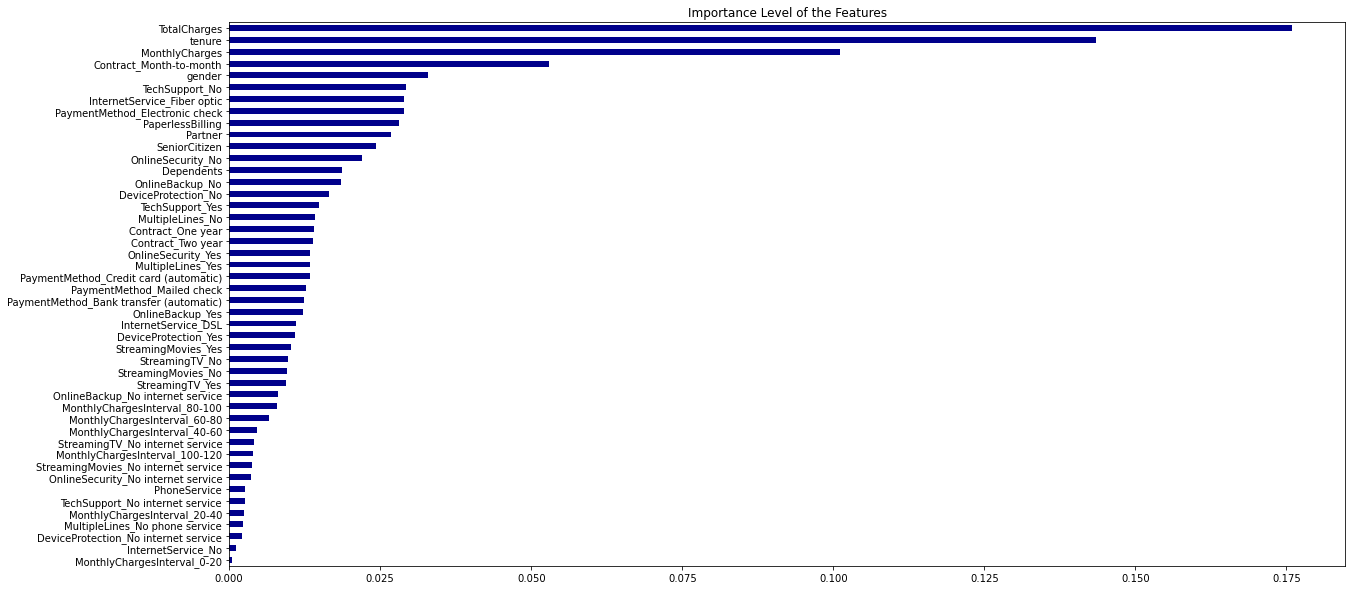

In [171]:
# Feature Importance by Random Forests
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=random_forest.feature_importances_,
                        index= X_train.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()


**MODELLING WITH KNN**

In [95]:
from sklearn.neighbors import KNeighborsClassifier


In [103]:
# KNN 
neighbors = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="minkowski")
neighbors.fit(X_sm_train, y_sm_train)
# neighbors.fit(X_train, y_train)
neighbors.score(X_test, y_test)
# neighbors.score(X_train, y_train)

0.7175301632363378

In [104]:
#     pred_train_sk = neighbors.predict(X_sm_train)
    
    
#     print("Train Dataset_ Smote dataset")
#     print(classification_report(y_sm_train,  pred_train_sk))

pred_testk = neighbors.predict(X_test)
print("Test with Original test Dataset")
print(classification_report(y_test,  pred_testk))

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1035
           1       0.47      0.53      0.50       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409



MODELLING WITH Support Vector Machines (SVM)

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score

In [ ]:
# training Data
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_sm_train, y_sm_train)

In [ ]:
# Prediction
y_pred= svc.predict(X_test)
print("Accuracy Rate of SVC: {:.3f}".format(accuracy_score(y_test, y_pred)))

In [ ]:
# Prediction
y_pred= svc.predict(X_test)
print("Accuracy Rate of SVC: {:.3f}".format(accuracy_score(y_test, y_pred)))

**MODELLING WITH XGBOOST**

In [25]:
import xgboost as xgb
import warnings
warnings.filterwarnings(action= "ignore")

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
 X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)

In [43]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_sm_train, y_sm_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgboost_model.score(X_test,y_test)

0.7750177430801988

In [45]:
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0], 
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.1, 0.3]}

In [46]:
xgboost = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost, parameters, cv = 3, n_jobs = -1, verbose = 2)

In [47]:
xgboost_cv.fit(X_sm_train, y_sm_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.5min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [48]:
xgboost_cv.score(X_test,y_test)

0.7849538679914834

In [35]:
best = xgboost_cv.best_params_
best

{'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [36]:
xgboost = XGBClassifier(gamma=5,
 learning_rate= 0.1,
 max_depth=3,
 n_estimators=100,
 subsample= 0.8)
xgb_tuned =  xgboost.fit(X_train,y_train)

In [39]:
xgb_tuned.score(X_test,y_test)

0.8150514731984381

In [49]:
#     pred_train_sr = random_forest.predict(X_sm_train)
pred_testr = xgboost_cv.predict(X_test)
    
#     print("Train Dataset_ Smote dataset")
#     print(classification_report(y_sm_train,  pred_train_sr))
    
print("Test with Original test Dataset")
print(classification_report(y_test,  pred_testr))

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.63      0.61       374

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409



In [107]:
XX=dfm.drop('Churn',axis=1)
yy=dfm.Churn

In [110]:
params = {"objective":"reg:logistic", "max_depth":3, "silent":1}
churn_dmatrix = xgb.DMatrix(data=X_sm_train, label=y_sm_train)
churn_cv = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(churn_cv)
print('Accuracy Value: {:.3f}'.format((1-churn_cv["test-error-mean"]).max()))
# xgb.fit(X_test,y_test)

[18:22:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:22:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:22:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.199082,0.004013,0.201861,0.008273
1,0.196605,0.006422,0.199083,0.013518
2,0.187063,0.009119,0.190867,0.005799
3,0.180841,0.001529,0.184950,0.012210
4,0.173532,0.002699,0.178546,0.009328


Accuracy Value: 0.821


**Feature importance by XGBOOST**

[15:07:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:07:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


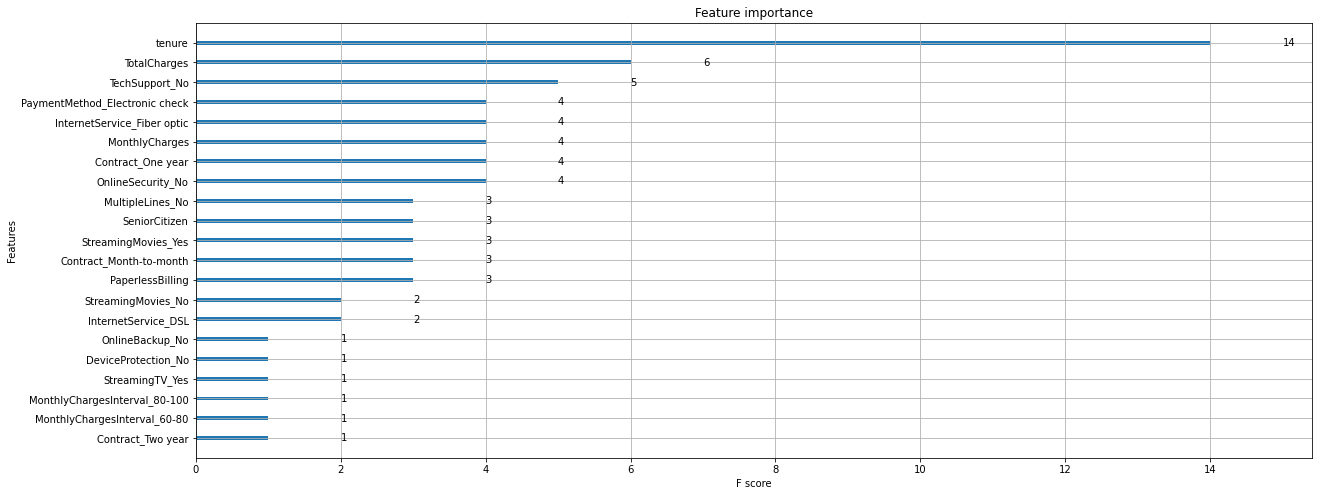

In [211]:
import matplotlib.pyplot as plt
churn_dmatrix = xgb.DMatrix(data=X, label=y)

best_parametes = {'objective':'reg:linear',
                       'colsample_bytree': 0.7, 
                       'gamma': 0.1, 
                       'learning_rate': 0.3, 
                       'max_depth': 3, 
                       'min_child_weight': 3, 
                       'n_estimators': 50,
                       'silent':1
                      }

churn_model = xgb.train(params=best_parametes, dtrain=churn_dmatrix, num_boost_round=10)

ax = xgb.plot_importance(churn_model)
ax.figure.set_size_inches(20,8)
plt.show()

**MODELLING WITH Light GBM**

In [53]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [54]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10}

In [64]:
# d_train = lgb.Dataset(X_sm_train, y_sm_train)
d_train = lgb.Dataset(X_train, label=y_train)

lgb_model = lgb.train(params, d_train, num_boost_round = 100)

y_predict=lgb_model.predict(X_test)
y_predict = [0 if y_predict < 0.5 else 1 for y_predict in y_predict]

accuracy=accuracy_score(y_predict,y_test)
accuracy

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 524
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


0.8062455642299503

In [65]:
# pred_train_sl = lgb_model.predict(X_sm_train)
# pred_train_sl = [0 if pred_train_sl < 0.5 else 1 for pred_train_sl in pred_train_sl]
    
pred_testl = lgb_model.predict(X_test)
pred_testl = [0 if pred_testl < 0.5 else 1 for pred_testl in pred_testl]
    
# print("Train Dataset_ Smote dataset")
# print(classification_report(y_sm_train,  pred_train_sl))
    
# print("Test with Original test Dataset")
# print(classification_report(y_test,  pred_testl))

print("Test with Original test Dataset")
print(classification_report(y_test,  pred_testl))

Test with Original test Dataset
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



**CONCLUSION**

In this project, I worked on the Telecom dataset. The aim of the project was to identify the customers who made Churn, that is, the customers who left or stayed, and to investigate the reasons for this. For this reason, I first did the data cleaning and then I made the dataset ready for analysis by doing feature engineering. First of all, I visualized Categorical and Numerical data with the help of graphics. After I realized that the data is an Imbalanced data, I resampled the SMOTE method with ADASYS and realized that the SMOTE method gave better results, and I used the SMOTE sampled data for subsequent analysis. In this project, I calculated the accuracy score of the model using Logistik regression, Random Forests, Decision Trees, XGBoost and LightGBM methods in the Modeling phase. In addition, Recall, Precision and F-1 scores were calculated for each model. Feature Importance graphics were drawn using Random Forest and XGBoost techniques. It was seen that similar features in both techniques had better predictive properties of Churn result. In Random Forest the three best Feature: Total_Charges, tenure, Montly_Charges while in XGBoost technique: tenure, Total_charges, Tech_Support_No. In my analysis, Random Forest (0.80) and LightGMB (0.81) gave the highest accuracy scores.